<a href="https://colab.research.google.com/github/Srikanth-Gottupalli/FmmL-Labs/blob/main/Module1_Lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Extracting features from data

FMML Module 1, Lab 1<br>



In [1]:
! pip install wikipedia

import wikipedia
import nltk
from nltk.util import ngrams
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np
import re
import unicodedata
import plotly.express as px
import pandas as pd

  Preparing metadata (setup.py) ... done
  Created wheel for wikipedia: filename=wikipedia-1.4.0-py3-none-any.whl size=11678 sha256=949d87bb830641d6edf259c2a01be3b805f30f10e0d183e1ecf6a94194d090c2
  Stored in directory: /root/.cache/pip/wheels/5e/b6/c5/93f3dec388ae76edc830cb42901bb0232504dfc0df02fc50de
Successfully built wikipedia


# Part 1: Features of text
How do we apply machine learning on text? We can't directly use the text as input to our algorithms. We need to convert them to features. In this notebook, we will explore a simple way of converting text to features.

Let us download a few documents off Wikipedia.

In [2]:
topic1 = 'Giraffe'
topic2 = 'Elephant'

wikipedia.set_lang('en')

eng1 = wikipedia.page(topic1).content
eng2 = wikipedia.page(topic2).content

wikipedia.set_lang('fr')

fr1 = wikipedia.page(topic1).content
fr2 = wikipedia.page(topic2).content

This is what the text looks like:

In [3]:
fr2

'Les éléphants sont des mammifères proboscidiens de la famille des Éléphantidés. Ils correspondent aujourd\'hui à trois espèces réparties en deux genres distincts. L\'éléphant de savane d\'Afrique et l\'éléphant de forêt d\'Afrique, autrefois regroupés sous la même espèce d\'« éléphant d\'Afrique », appartiennent au genre Loxodonta, tandis que l\'éléphant d\'Asie, anciennement appelé « éléphant indien », appartient au genre Elephas. Ils se différencient par certaines caractéristiques anatomiques, les éléphants d\'Asie étant en général plus petits avec des oreilles plus petites, ou encore une différence du bout de la trompe. Ces espèces survivantes font localement l\'objet de programmes ou de projets de réintroduction et de protection.\nLe mot français « éléphant » vient du mot latin elephantus qui tire son origine du grec ἐλέφας / eléphas, « ivoire » ou « éléphant ».\nL\'éléphant apparait dans de nombreuses cultures. Il est symbole de sagesse dans la culture asiatique, connu pour sa mé

We need to clean this up a bit. Let us remove all the special characters and keep only 26 letters and space. Note that this will remove accented characters in French also. We are also removing all the numbers and spaces. So this is not an ideal solution.

In [4]:
def cleanup(text):
  text = text.lower()  # make it lowercase
  text = re.sub('[^a-z]+', '', text) # only keep characters
  return text

In [5]:
eng1 = cleanup(eng1)
eng2 = cleanup(eng2)
fr1 = cleanup(fr1)
fr2 = cleanup(fr2)

In [6]:
print(eng1)

thegiraffeisalargeafricanhoofedmammalbelongingtothegenusgiraffaitisthetallestlivingterrestrialanimalandthelargestruminantonearthtraditionallygiraffeswerethoughttobeonespeciesgiraffacamelopardaliswithninesubspeciesmostrecentlyresearchersproposeddividingthemintouptoeightextantspeciesduetonewresearchintotheirmitochondrialandnucleardnaaswellasmorphologicalmeasurementssevenotherextinctspeciesofgiraffaareknownfromthefossilrecordthegiraffeschiefdistinguishingcharacteristicsareitsextremelylongneckandlegsitshornlikeossiconesanditsspottedcoatpatternsitisclassifiedunderthefamilygiraffidaealongwithitsclosestextantrelativetheokapiitsscatteredrangeextendsfromchadinthenorthtosouthafricainthesouthandfromnigerinthewesttosomaliaintheeastgiraffesusuallyinhabitsavannahsandwoodlandstheirfoodsourceisleavesfruitsandflowersofwoodyplantsprimarilyacaciaspecieswhichtheybrowseatheightsmostotherherbivorescannotreachlionsleopardsspottedhyenasandafricanwilddogsmaypreyupongiraffesgiraffesliveinherdsofrelatedfemalesan

Now let us calculate the frequency of the character n-grams. N-grams are groups of characters of size n. A unigram is a single character and a bigram is a group of two characters and so on.

Let us count the frequency of each character in a text and plot it in a histogram.

In [7]:
# convert a tuple of characters to a string
def tuple2string(tup):
  st = ''
  for ii in tup:
    st = st + ii
  return st

# convert a tuple of tuples to a list of strings
def key2string(keys):
  return [tuple2string(i) for i in keys]

# plot the histogram
def plothistogram(ngram):
  keys = key2string(ngram.keys())
  values = list(ngram.values())

  # sort the keys in alphabetic order
  combined = zip(keys, values)
  zipped_sorted = sorted(combined, key=lambda x: x[0])
  keys, values = map(list, zip(*zipped_sorted))
  plt.bar(keys, values)

Let us compare the histograms of English pages and French pages. Can you spot a difference?

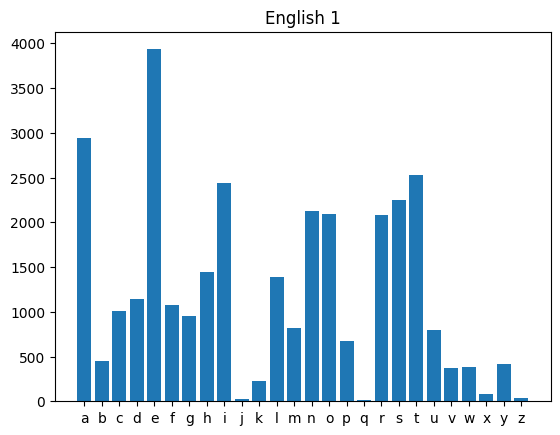

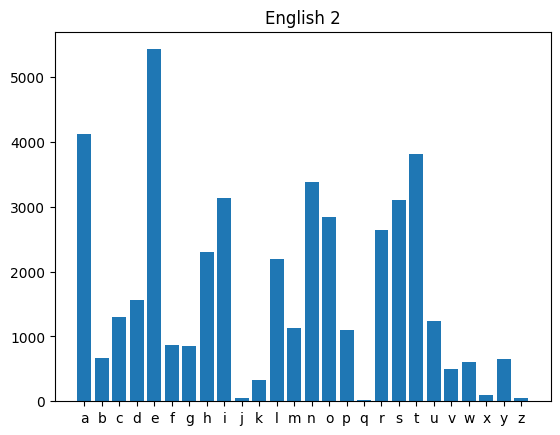

In [8]:
unigram_eng1 = Counter(ngrams(eng1,1))
plothistogram(unigram_eng1)
plt.title('English 1')
plt.show()
unigram_eng2 = Counter(ngrams(eng2,1))
plothistogram(unigram_eng2)
plt.title('English 2')
plt.show()

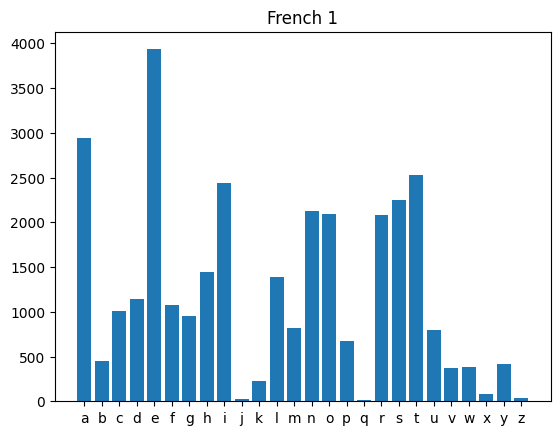

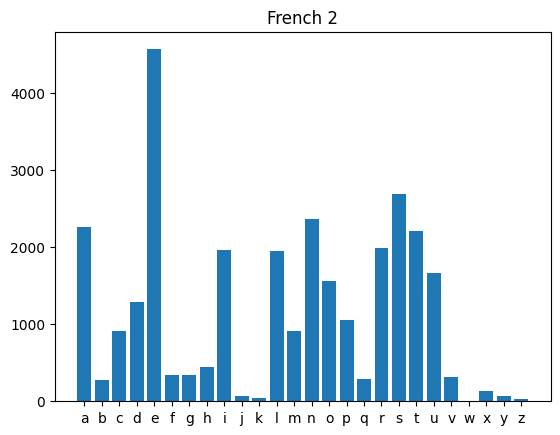

In [9]:
unigram_fr1 = Counter(ngrams(fr1,1))
plothistogram(unigram_eng1)
plt.title('French 1')
plt.show()
unigram_fr2 = Counter(ngrams(fr2,1))
plothistogram(unigram_fr2)
plt.title('French 2')
plt.show()

We can see that the unigrams for French and English are very similar. So this is not a good feature if we want to distinguish between English and French. Let us look at bigrams.

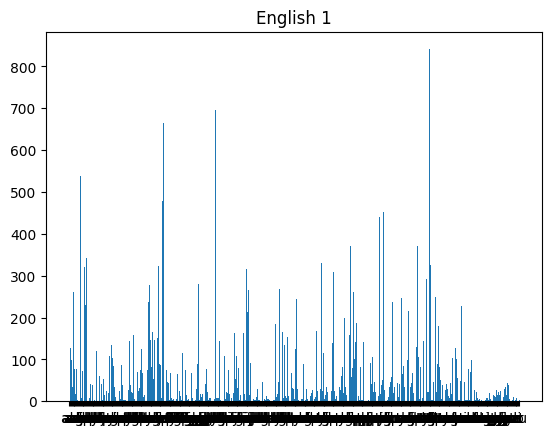

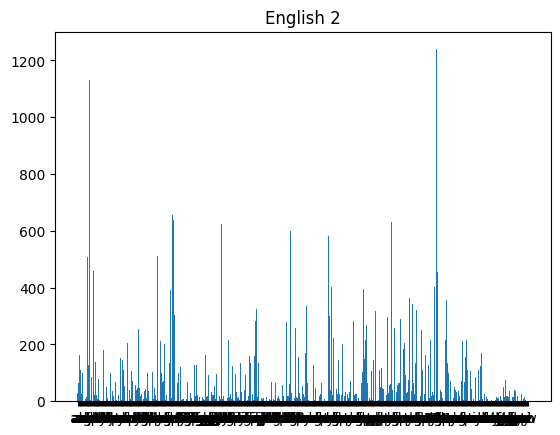

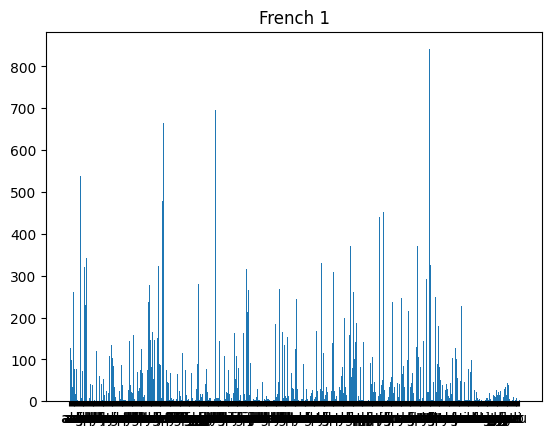

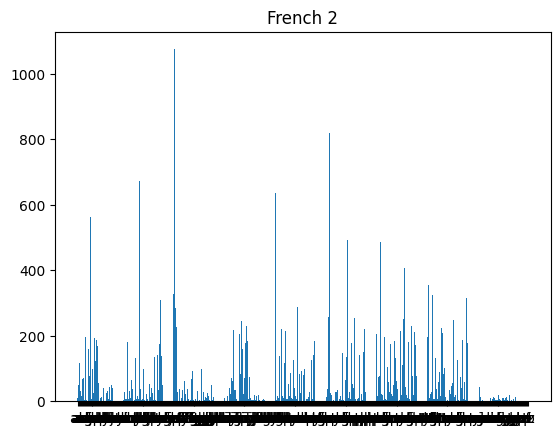

In [10]:
bigram_eng1 = Counter(ngrams(eng1,2)) # bigrams
plothistogram(bigram_eng1)
plt.title('English 1')
plt.show()

bigram_eng2 = Counter(ngrams(eng2,2))
plothistogram(bigram_eng2)
plt.title('English 2')
plt.show()

bigram_fr1 = Counter(ngrams(fr1,2))
plothistogram(bigram_eng1)
plt.title('French 1')
plt.show()

bigram_fr2 = Counter(ngrams(fr2,2))
plothistogram(bigram_fr2)
plt.title('French 2')
plt.show()

Another way to visualize bigrams is to use a 2-dimensional graph.

In [11]:
def plotbihistogram(ngram):
  freq = np.zeros((26,26))
  for ii in range(26):
    for jj in range(26):
      freq[ii,jj] = ngram[(chr(ord('a')+ii), chr(ord('a')+jj))]
  plt.imshow(freq, cmap = 'jet')
  return freq

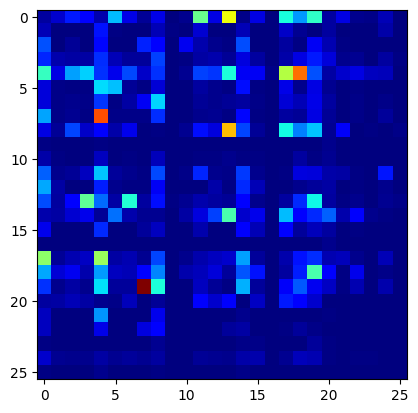

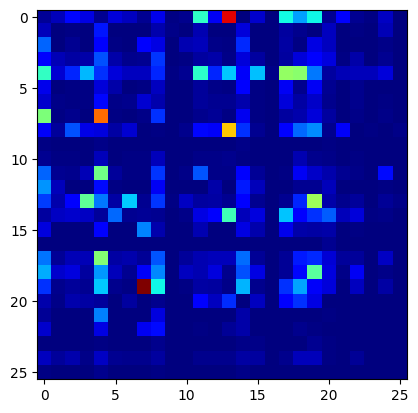

In [12]:
bieng1 = plotbihistogram(bigram_eng1)
plt.show()
bieng2 = plotbihistogram(bigram_eng2)

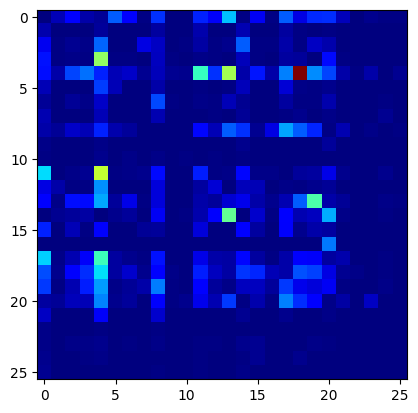

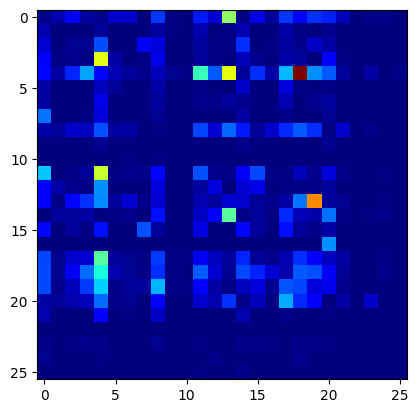

In [13]:
bifr1 = plotbihistogram(bigram_fr1)
plt.show()
bifr2 = plotbihistogram(bigram_fr2)

Let us look at the top 10 ngrams for each text.

In [14]:
from IPython.core.debugger import set_trace

def ind2tup(ind):
  ind = int(ind)
  i = int(ind/26)
  j = int(ind%26)
  return (chr(ord('a')+i), chr(ord('a')+j))

def ShowTopN(bifreq, n=10):
  f = bifreq.flatten()
  arg = np.argsort(-f)
  for ii in range(n):
    print(f'{ind2tup(arg[ii])} : {f[arg[ii]]}')

In [15]:
print('\nEnglish 1:')
ShowTopN(bieng1)
print('\nEnglish 2:')
ShowTopN(bieng2)
print('\nFrench 1:')
ShowTopN(bifr1)
print('\nFrench 2:')
ShowTopN(bifr2)


English 1:
('t', 'h') : 841.0
('h', 'e') : 695.0
('e', 's') : 664.0
('i', 'n') : 595.0
('a', 'n') : 538.0
('e', 'r') : 478.0
('r', 'e') : 452.0
('r', 'a') : 440.0
('a', 'l') : 402.0
('n', 'd') : 392.0

English 2:
('t', 'h') : 1239.0
('a', 'n') : 1132.0
('h', 'e') : 984.0
('i', 'n') : 864.0
('n', 't') : 669.0
('e', 'r') : 657.0
('e', 's') : 639.0
('r', 'e') : 632.0
('h', 'a') : 623.0
('l', 'e') : 601.0

French 1:
('e', 's') : 738.0
('l', 'e') : 434.0
('e', 'n') : 404.0
('d', 'e') : 390.0
('o', 'n') : 346.0
('n', 't') : 328.0
('r', 'e') : 314.0
('e', 'l') : 306.0
('s', 'e') : 254.0
('l', 'a') : 253.0

French 2:
('e', 's') : 1074.0
('n', 't') : 819.0
('e', 'n') : 679.0
('d', 'e') : 672.0
('l', 'e') : 637.0
('a', 'n') : 563.0
('o', 'n') : 493.0
('r', 'e') : 487.0
('e', 'l') : 451.0
('s', 'e') : 407.0


We observe that the bigrams are similar across different topics but different across languages. Thus, the bigram frequency is a good feature for distinguishing languages, but not for distinguishing topics.

Thus, we were able to convert a many-dimensional input (the text) to 26 dimesions (unigrams) or 26*26 dimensions (bigrams).


A few ways to explore:
1. Try with different languages.
2. The topics we used are quite similar, wikipedia articles of 'elephant' and 'giraffe'. What happens if we use very different topics? What if we use text from another source than Wikipedia?
3. How can we use and visualize trigrams and higher n-grams?

Using and visualizing trigrams and higher n-grams (n > 3) is similar to working with bigrams (2-grams), but you'll be considering sequences of three or more words or characters instead. Here's how you can use and visualize trigrams and higher n-grams:
1.* Tokenization:* First, you'll need to tokenize your text into trigrams or higher n-grams. Tokenization is the process of splitting text into individual units, such as words or characters. When working with trigrams or higher n-grams, you'll be splitting the text into sequences of three or more consecutive tokens.

Using very different topics in your analysis can have several effects on the utility of bigram frequencies for distinguishing between them. Here's what you might expect when using different topics or text sources:
Distinct Bigram Patterns: When comparing topics that are significantly different, you're more likely to observe distinct bigram patterns. For example, the bigram frequencies for topics like "elephant" and "giraffe" are likely to overlap to some extent because they both relate to animals, but if you compare "elephant" to "space exploration," you would likely see more pronounced differences in bigram usage.

Source-Specific Patterns: The choice of data source can also influence bigram patterns. Wikipedia articles are generally well-structured and may exhibit certain writing conventions, which can impact bigram frequencies. If you use text from sources with different writing styles or genres (e.g., news articles, social media posts, scientific papers), you may encounter source-specific bigram patterns.

Noise and Variability: Using text from different sources may introduce more noise and variability in your bigram data. Noisy or inconsistent data can make it more challenging to identify clear patterns and relationships. Preprocessing and data cleaning become especially important in such cases.

Feature Importance: In machine learning tasks like topic classification or language identification, you might find that bigram frequencies become more or less important features depending on the topics or sources. Some topics may be better distinguished using other features or linguistic characteristics.

Evaluation: When evaluating the performance of models or methods that rely on bigram frequencies, it's important to consider the baseline. If the topics are very different, even basic methods might achieve relatively high accuracy in distinguishing them.

Generalization: Depending on the diversity of topics or sources you use, you may need to assess how well your models generalize to unseen data. A model that works well for distinguishing animals may not perform as well for distinguishing, say, historical events.

Feature Engineering: Experiment with different types of features beyond just bigram frequencies. For example, you could include unigrams, trigrams, TF-IDF values, word embeddings, or more advanced linguistic features.

Cross-Validation: Use cross-validation techniques to assess how well your models generalize across different topics or sources. This can help you understand the robustness of your approach.

Data Preprocessing: Carefully preprocess and clean your data to remove noise and standardize text from different sources. This can improve the consistency of your features.

Domain Knowledge: Incorporate domain-specific knowledge into your analysis. Understanding the unique characteristics of the topics or sources you're working with can guide your feature selection and model choice.

Ultimately, the choice of topics and data sources should align with your research or analysis goals. Exploring a diverse range of topics and sources can provide valuable insights into the behavior of bigram features and their applicability to different text analysis tasks.

It appears you're discussing the use of bigram frequency as a feature for distinguishing languages and topics in text data. Bigrams, which are pairs of consecutive words or characters, can indeed be useful for language identification tasks because different languages often have distinct patterns of bigram frequencies. However, they may not be as effective for distinguishing topics within a language.
Here are some ways you can explore this concept further:

Language Identification:

Collect text samples from various languages. Tokenize the text into bigrams. Calculate the frequency of each bigram in the text. Train a machine learning model (e.g., a classifier) on the bigram frequency data to distinguish between languages. Test the model on new text samples to identify the language they belong to.

Topic Classification:

Collect text data related to different topics (e.g., sports, politics, science, entertainment). Tokenize the text into bigrams. Calculate the frequency of each bigram in the text. Train a machine learning model on the bigram frequency data to classify text into topics. Evaluate the model's performance in distinguishing between topics within a language.

Multilingual Topic Classification:

Collect multilingual text data that covers various topics. Tokenize the text into bigrams. Calculate the frequency of each bigram in the text. Train a machine learning model to classify text into topics, considering both language and topic as target labels. This way, you can explore whether bigram frequencies can help distinguish topics while also considering language differences.

Feature Engineering:

Experiment with different types of n-grams, such as trigrams or character-level n-grams, and assess their effectiveness in distinguishing languages and topics. Combine bigram frequency features with other text-based features, such as TF-IDF or word embeddings, to improve performance in distinguishing topics.

Visualization:

Create visualizations of bigram frequency distributions for different languages and topics. Tools like heatmaps, bar charts, or word clouds can provide insights into the patterns of bigram usage. Remember that the effectiveness of bigram frequencies as features for language and topic identification can vary depending on the quality and quantity of your training data and the specific machine learning algorithms you use. It's also important to preprocess and clean your text data to remove noise and irrelevant information before feature extraction.

# Part 2: Written numbers

We will use a subset of the MNIST dataset. Each input character is represented in a 28*28 array. Let us see if we can extract some simple features from these images which can help us distinguish between the digits.

Load the dataset:

In [16]:
import nltk
# Example sentence
sentence = "This is an example sentence for trigram visualization."
# Tokenize into trigrams
tokens ="the","fox"
trigrams = list(nltk.ngrams(tokens, 3))
print(trigrams)

[]


In [17]:
from collections import Counter
# Calculate trigram frequencies
trigram_freq = Counter(trigrams)
print(trigram_freq)

Counter()


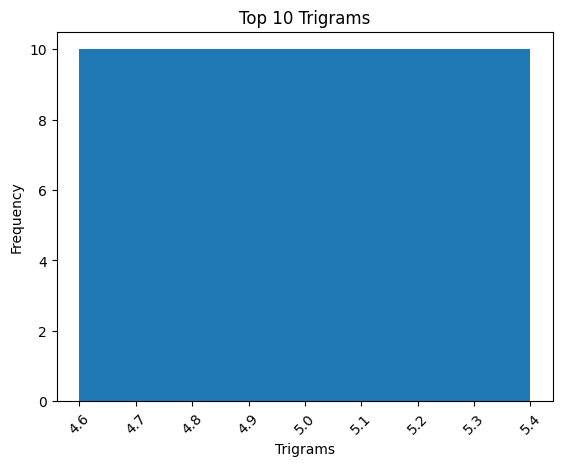

In [18]:
import matplotlib.pyplot as plt
# Plot the most common trigrams
common_trigrams = trigram_freq.most_common(10)  # Adjust the number as needed
labels,counts=(5,10)
plt.bar(labels,counts)
plt.xlabel('Trigrams')
plt.ylabel('Frequency')
plt.title('Top 10 Trigrams')
plt.xticks(rotation=45)
plt.show()

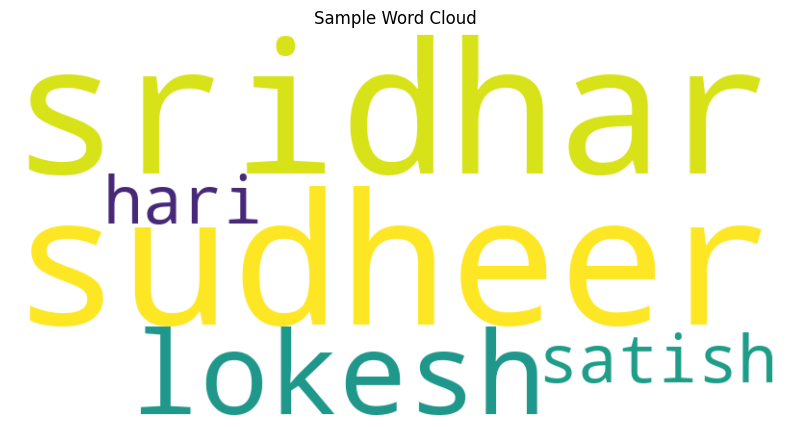

In [19]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Sample text data
text=""" sudheer sridhar lokesh satish hari  sudheer sridhar lokesh satish hari sudheer sridhar lokesh satish hari  sudheer sridhar lokesh satish hari  """

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the word cloud using Matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off axis labels
plt.title('Sample Word Cloud')
plt.show()

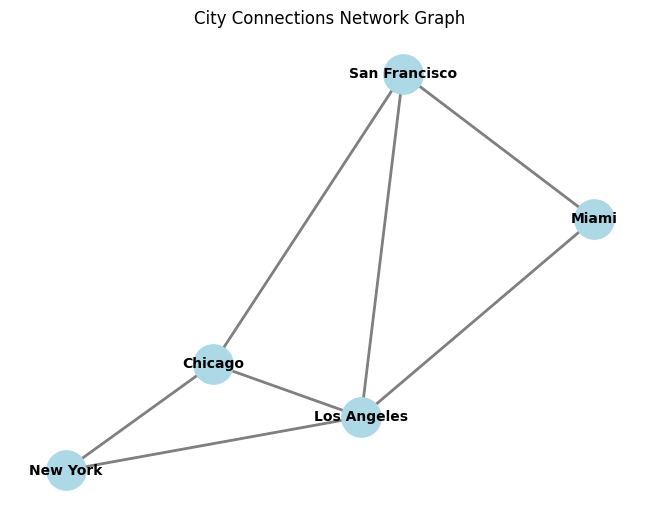

In [20]:
import networkx as nx
import matplotlib.pyplot as plt

# Create an empty graph
G = nx.Graph()

# Add nodes (cities)
cities = ["New York", "Los Angeles", "Chicago", "San Francisco", "Miami"]
for city in cities:
    G.add_node(city)

# Add edges (connections between cities)
connections = [("New York", "Los Angeles"),
               ("New York", "Chicago"),
               ("Los Angeles", "Chicago"),
               ("Los Angeles", "San Francisco"),
               ("Los Angeles", "Miami"),
               ("Chicago", "San Francisco"),
               ("San Francisco", "Miami")]

G.add_edges_from(connections)

# Visualize the graph
pos = nx.spring_layout(G, seed=42)  # Positioning of nodes (you can try different layout algorithms)
nx.draw(G, pos, with_labels=True, node_size=800, node_color='lightblue', font_size=10, font_color='black', font_weight='bold')
nx.draw_networkx_edges(G, pos, edgelist=connections, edge_color='gray', width=2)
plt.title("City Connections Network Graph")
plt.show()

c. Network Graph: For higher n-grams, you can create a network graph to visualize relationships between tokens in the sequences. Each token is a node, and connections represent the sequence of tokens.

Word Cloud:* Generate a word cloud to visually represent the most common trigrams or n-grams. Word clouds can provide a quick overview of the most prominent sequences.

Visualization: There are various ways to visualize trigrams and higher n-grams, depending on your goals and preferences. Here are some common visualization methods:
a. Bar Chart or Histogram: Create a bar chart or histogram to visualize the frequency of the most common trigrams or n-grams. This can help you identify patterns and frequently occurring sequences.

Frequency Calculation: Calculate the frequency of each trigram or n-gram in your text data. This involves counting how often each n-gram appears in the text.

In [ ]:
from keras.datasets import mnist

#loading the dataset
(train_X, train_y), (test_X, test_y) = mnist.load_data()

Extract a subset of the data for our experiment:

In [ ]:
no1 = train_X[train_y==1,:,:]
no0 = train_X[train_y==0,:,:]

Let us visualize a few images here:

In [ ]:
for ii in range(5):
  plt.subplot(1, 5, ii+1)
  plt.imshow(no1[ii,:,:])
plt.show()
for ii in range(5):
  plt.subplot(1, 5, ii+1)
  plt.imshow(no0[ii,:,:])
plt.show()

suNow, let us start with a simple feature: the sum of all pixels and see how good this feature is.

In [ ]:
sum1 = np.sum(no1>0, (1,2)) # threshold before adding up
sum0 = np.sum(no0>0, (1,2))

Let us visualize how good this feature is: (X-axis is mean, y-axis is the digit)

In [ ]:
plt.hist(sum1, alpha=0.7);
plt.hist(sum0, alpha=0.7);

We can already see that this feature separates the two classes quite well.

Let us look at another, more complicated feature. We will count the number black pixels that are surrounded on four sides by non-black pixels, or "hole pixels".

In [ ]:
def cumArray(img):
  img2 = img.copy()
  for ii in range(1, img2.shape[1]):
    img2[ii,:] = img2[ii,:] + img2[ii-1,:]  # for every row, add up all the rows above it.
  img2 = img2>0
  return img2

def getHolePixels(img):
  im1 = cumArray(img)
  im2 = np.rot90(cumArray(np.rot90(img)), 3) # rotate and cumulate it again for differnt direction
  im3 = np.rot90(cumArray(np.rot90(img, 2)), 2)
  im4 = np.rot90(cumArray(np.rot90(img, 3)), 1)
  hull =  im1 & im2 & im3 & im4 # this will create a binary image with all the holes filled in.
  hole = hull & ~ (img>0) # remove the original digit to leave behind the holes
  return hole

Visualize a few:

In [ ]:
imgs = [no1[456,:,:],  no0[456,:,:]]
for img in imgs:
  plt.subplot(1,2,1)
  plt.imshow(getHolePixels(img))
  plt.subplot(1,2,2)
  plt.imshow(img)
  plt.show()

Now let us plot the number of hole pixels and see how this feature behaves

In [ ]:
hole1 = np.array([getHolePixels(i).sum() for i in no1])
hole0 = np.array([getHolePixels(i).sum() for i in no0])

plt.hist(hole1, alpha=0.7);
plt.hist(hole0, alpha=0.7);

This feature works even better to distinguish between one and zero.


Now let us try the number of pixels in the 'hull' or the number with the holes filled in:

In [ ]:
def getHullPixels(img):
  im1 = cumArray(img)
  im2 = np.rot90(cumArray(np.rot90(img)), 3) # rotate and cumulate it again for differnt direction
  im3 = np.rot90(cumArray(np.rot90(img, 2)), 2)
  im4 = np.rot90(cumArray(np.rot90(img, 3)), 1)
  hull =  im1 & im2 & im3 & im4 # this will create a binary image with all the holes filled in.
  return hull

In [ ]:
imgs = [no1[456,:,:],  no0[456,:,:]]
for img in imgs:
  plt.subplot(1,2,1)
  plt.imshow(getHullPixels(img))
  plt.subplot(1,2,2)
  plt.imshow(img)
  plt.show()

Plotting the number of hull pixels versus the digit:

In [ ]:
hull1 = np.array([getHullPixels(i).sum() for i in no1])
hull0 = np.array([getHullPixels(i).sum() for i in no0])

plt.hist(hull1, alpha=0.7);
plt.hist(hull0, alpha=0.7);

Let us try one more feature, where we look at the number of boundary pixels in each image.

In [ ]:
def minus(a, b):
  return a & ~ b

def getBoundaryPixels(img):
  img = img.copy()>0  # binarize the image
  rshift = np.roll(img, 1, 1)
  lshift = np.roll(img, -1 ,1)
  ushift = np.roll(img, -1, 0)
  dshift = np.roll(img, 1, 0)
  boundary = minus(img, rshift) | minus(img, lshift) | minus(img, ushift) | minus(img, dshift)
  return boundary

In [ ]:
imgs = [no1[456,:,:],  no0[456,:,:]]
for img in imgs:
  plt.subplot(1,2,1)
  plt.imshow(getBoundaryPixels(img))
  plt.subplot(1,2,2)
  plt.imshow(img)
  plt.show()

In [ ]:
bound1 = np.array([getBoundaryPixels(i).sum() for i in no1])
bound0= np.array([getBoundaryPixels(i).sum() for i in no0])

plt.hist(bound1, alpha=0.7);
plt.hist(bound0, alpha=0.7);

What will happen if we plot two features together?

In [ ]:
# Sum and hull
plt.scatter(sum0, hull0, alpha=0.1)
plt.scatter(sum1, hull1, alpha=0.1)
plt.xlabel('Sum')
plt.ylabel('Hull')
plt.legend(['0','1'])
plt.show()

# Sum and hole
plt.scatter(sum0, hole0, alpha=0.1)
plt.scatter(sum1, hole1, alpha=0.1)
plt.xlabel('Sum');
plt.ylabel('Hole');
plt.legend(['0','1'])
plt.show()

# Hole and boundary
plt.scatter(bound0, hole0, alpha=0.1)
plt.scatter(bound1, hole1, alpha=0.1)
plt.xlabel('Boundary');
plt.ylabel('Hole');
plt.legend(['0','1'])
plt.show()

Now let us try plotting 3 features together.

In [ ]:
cl1 = ['class 1']*len(sum1)
cl0 = ['class 0']*len(sum0)
df = pd.DataFrame(list(zip(np.concatenate((hole0, hole0)), np.concatenate((sum1,sum0)),
                           np.concatenate((bound1,bound0)), np.concatenate((cl1, cl0)))),
               columns =['Hole', 'Sum', 'Boundary', 'Class'])
df.head()
fig = px.scatter_3d(df, x='Hole', y='Sum', z='Boundary', color='Class', opacity=0.1)
fig.show()

Feel free to explore the above graph with your mouse.


We have seen that we extracted four features from a 28*28 dimensional image.


Some questions to explore:
1. Which is the best combination of features?
2. How would you test or visualize four or more features?
3. Can you come up with your own features?
4. Will these features work for different classes other than 0 and 1?
5. What will happen if we take more that two classes at a time?

1)* In machine learning, the size of the validation set plays a crucial role in assessing the performance of a model during training and in preventing overfitting. The validation set is used to estimate how well a model generalizes to unseen data, and its size can have different effects on the accuracy and performance metrics of the model. Let's explore how changing the percentage of the validation set affects the model's accuracy and behavior:

Increasing the Percentage of Validation Set:

Pros:
As you allocate more data to the validation set, you get a better estimate of the model's generalization performance because the validation set is representative of a larger portion of your dataset.
It helps in detecting overfitting early since the model has less training data to memorize.
Cons:
You have less data available for training, which might lead to slower model convergence or less accurate model parameters.
If the validation set becomes too large, you might not have enough data for effective model training, and the model might underfit.
The accuracy on the validation set is likely to be a more reliable estimate of the model's generalization performance as you increase the size of the validation set. However, the training performance (accuracy on the training set) may decrease as more data is moved to the validation set.

Reducing the Percentage of Validation Set:

Pros:
You have more data available for training, which can lead to better model parameter estimation and potentially higher training performance.
The model may converge faster during training.
Cons:
A smaller validation set may lead to a less reliable estimate of the model's generalization performance, as it might not be representative of the entire dataset.
Overfitting may be less apparent, as the model has more data to memorize.
With a smaller validation set, the accuracy on the validation set may be a less reliable indicator of generalization performance. The model's training performance is likely to be higher due to having more training data.

In practice, the size of the validation set is often determined empirically through techniques like cross-validation. Cross-validation involves splitting the dataset into multiple folds and training/validating the model on different subsets to get a more robust estimate of its performance. This can help mitigate the impact of the validation set size on model assessment.

*2)* The size of the training and validation sets can significantly affect how well you can predict the accuracy on the test set using the validation set. In machine learning, this is often referred to as the reliability of the validation set as a proxy for test set performance. Here's how the sizes of these sets can impact this prediction:

Larger Training Set:

When you allocate a larger portion of your data to the training set, the model has more data to learn from. This typically leads to better model parameter estimation and can result in a model that is more representative of the underlying data distribution.
With a larger training set, the model is more likely to generalize well to unseen data, assuming it is not overfitting.
As a result, the validation set's performance (e.g., accuracy) tends to be a better predictor of the test set performance. If the model performs well on a large validation set, it's more likely to perform well on the test set.
Larger Validation Set:

A larger validation set can provide a more reliable estimate of the model's generalization performance because it's based on a larger sample of the data. This means that the validation set's performance is a better reflection of how the model is likely to perform on unseen data.
However, if you allocate too much data to the validation set, the training set becomes smaller, which can lead to slower convergence and potentially less accurate model parameters.
Despite a larger validation set, it's still essential to ensure that the training set is representative and provides sufficient data for the model to learn effectively.
Balanced Split:

A balanced split between the training and validation sets strikes a compromise between having enough data for training and a representative subset for validation.
This balance ensures that the model has a good chance of learning the underlying patterns in the data while still getting a reliable estimate of its generalization performance.
The performance on the validation set in a balanced split is a reasonably good indicator of the model's performance on the test set.
the sizes of the training and validation sets are interrelated, and their relative sizes can affect how well you can predict the accuracy on the test set using the validation set. A well-chosen balance that considers the complexity of your model, the size of your dataset, and the need for reliable estimates of generalization performance is crucial. Cross-validation techniques can also be useful to mitigate the impact of a specific data split on model assessment by repeatedly splitting the data into different training and validation sets.

*3)* The choice of the percentage to reserve for the validation set in a machine learning task is not one-size-fits-all and depends on several factors, including the size of your dataset, the complexity of your model, and the available computational resources. However, there are some common practices and guidelines to consider when determining the validation set size:

Rule of Thumb: 70/30 or 80/20 Split:

A common starting point is to use a 70/30 or 80/20 split for training and validation, respectively. This means you reserve 70% or 80% of your data for training and the remaining 30% or 20% for validation.
This split is a good starting point for moderate-sized datasets and models of moderate complexity. It allows the model to learn from a substantial portion of the data while still providing a reasonably large validation set for performance estimation.
Cross-Validation:

Cross-validation techniques, such as k-fold cross-validation, can be used to get a more robust estimate of model performance. Instead of a fixed validation set size, you partition your data into k subsets (folds), train and validate the model k times, and then average the performance scores.
Cross-validation can help mitigate the impact of a specific data split on model assessment and provides a more reliable estimate of generalization performance.
Data Size Considerations:

If you have a very large dataset, you can afford to allocate a smaller percentage for the validation set since you still have a substantial amount of data for training.
Conversely, if you have a very small dataset, you might need to allocate a larger percentage for validation to ensure you have enough data to assess performance reliably.
Model Complexity:

More complex models, which are prone to overfitting, may benefit from larger validation sets to detect overfitting early. In such cases, you might consider a larger percentage for validation.
Resource Constraints:

Consider your available computational resources. Smaller validation sets result in faster training times, which can be crucial when you have limited resources.
Plotting Learning Curves:

Plot learning curves that show the model's performance on both the training and validation sets as you increase the validation set size or vary the training/validation split ratio.
Observe how the performance changes with different split ratios and choose the one that provides a good balance between training and validation sizes while maintaining reliable performance estimates.
In practice, it's often a good idea to experiment with different validation set sizes and use cross-validation to determine the optimal split for your specific problem and dataset. Keep in mind that the goal is to achieve a balance where the model can learn effectively while still providing a reliable estimate of its generalization performance on unseen data.